In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE


In [2]:
main_path = 'D:\\Downloads\\'
patient_df = pd.read_csv(main_path    + 'patient-data.csv')
curse_df_s1 = pd.read_excel(main_path + 'curse-of-dimensionality.xlsx', sheet_name='Sheet1')
curse_df_s2 = pd.read_excel(main_path + 'curse-of-dimensionality.xlsx', sheet_name='Sheet2')
curse_df_s3 = pd.read_excel(main_path + 'curse-of-dimensionality.xlsx', sheet_name='Sheet3')

display(patient_df)
display(curse_df_s1)
display(curse_df_s2)
display(curse_df_s3)

,p01,p02,p03,p04,p05,p06,p07,p08,p09,p10,...,p16,p17,p18,p19,p20,p21,p22,p23,p24,Ailment
0,123.267876,178.595162,16.399606,410204.1015,8834.625206,4.809562,42.033429,92.318682,27.004825,35.257693,...,5.041603,81.518196,49.968044,11.828202,28.273439,97.398323,0.649258,0.018998,2.891522,Healthy
1,78.099990,125.917170,17.343260,421416.3821,7551.743543,4.650226,40.209919,85.496273,28.292545,34.059034,...,5.799974,109.089298,41.420259,40.000000,20.125301,85.016603,1.023012,0.033543,1.499165,Diabetes
2,102.281198,133.735334,15.709720,267971.2381,6030.085265,4.623836,46.893548,85.234094,32.408743,32.082015,...,4.964792,92.357938,48.048329,10.000000,25.097262,74.378111,0.862670,0.032801,2.929267,Thalasse
3,79.183690,125.291132,15.201283,204385.8555,4507.019659,4.352788,38.891841,93.113226,27.778412,34.040408,...,4.000000,70.448002,56.574596,18.282211,27.763620,65.041476,0.911120,0.026088,1.321096,Anemia
4,82.117428,187.164685,17.452967,384908.4868,7096.110188,4.696469,50.803614,88.335091,28.600120,35.299643,...,4.884780,77.147088,43.833396,10.259593,26.937302,92.952192,0.687618,0.032591,0.340852,Thalasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,76.572607,172.625939,14.051388,290333.9243,6812.282026,5.045056,41.343293,85.930350,30.809645,32.010222,...,5.339260,109.603762,40.880365,37.032578,34.046761,93.840306,1.155656,0.001644,1.605400,Heart Disease
2367,75.673268,148.400574,16.861712,371089.7664,7145.707927,4.606055,44.852119,83.167877,29.080200,33.307993,...,4.894395,97.547613,50.708991,25.971923,23.784820,61.323579,1.084736,0.002472,0.042041,Heart Disease
2368,110.631390,158.827371,14.875827,402135.7133,10018.293600,5.028186,45.251093,92.364866,29.266202,33.748808,...,4.010236,78.189211,59.265939,12.704390,35.673088,89.753172,0.638017,0.022464,0.451488,Heart Disease
2369,77.287401,136.245668,16.460080,214182.1995,10337.452860,5.297373,41.841466,88.375888,28.618894,35.109696,...,4.555711,92.440233,52.233607,14.648308,13.494866,65.764594,0.657539,0.015599,2.672486,Heart Disease


,y,x1
0,0.974916,0.025641
1,0.879902,0.051282
2,0.602598,0.076923
3,0.247088,0.102564
4,1.116373,0.128205
5,0.653060,0.153846
6,0.794016,0.179487
7,0.956405,0.205128
8,0.462772,0.230769
9,0.518899,0.256410


,y,x1,x2,x3,x4,x5,x6,x7,x8
0,0.974916,0.025641,0.000657,0.000017,0.025638,0.025635,-1.591065,0.160128,0.294880
1,0.879902,0.051282,0.002630,0.000135,0.051260,0.051237,-1.290035,0.226455,0.371525
2,0.602598,0.076923,0.005917,0.000455,0.076847,0.076772,-1.113943,0.277350,0.425290
3,0.247088,0.102564,0.010519,0.001079,0.102384,0.102206,-0.989005,0.320256,0.468093
4,1.116373,0.128205,0.016437,0.002107,0.127854,0.127507,-0.892095,0.358057,0.504237
5,0.653060,0.153846,0.023669,0.003641,0.153240,0.152644,-0.812913,0.392232,0.535832
6,0.794016,0.179487,0.032216,0.005782,0.178525,0.177584,-0.745967,0.423659,0.564085
7,0.956405,0.205128,0.042078,0.008631,0.203693,0.202299,-0.687975,0.452911,0.589760
8,0.462772,0.230769,0.053254,0.012289,0.228726,0.226758,-0.636822,0.480384,0.613375
9,0.518899,0.256410,0.065746,0.016858,0.253610,0.250935,-0.591065,0.506370,0.635299


,y,x1,x2,x3,x4,x5,x6,x7,x8
0,0.974916,0.025641,0.000657,0.000017,0.025638,0.025635,-1.591065,0.160128,0.008547
1,0.879902,0.051282,0.002630,0.000135,0.051260,0.051237,-1.290035,0.226455,0.017094
2,0.602598,0.076923,0.005917,0.000455,0.076847,0.076772,-1.113943,0.277350,0.025641
3,0.247088,0.102564,0.010519,0.001079,0.102384,0.102206,-0.989005,0.320256,0.034188
4,1.116373,0.128205,0.016437,0.002107,0.127854,0.127507,-0.892095,0.358057,0.042735
...,...,...,...,...,...,...,...,...,...
94,3.539042,2.435897,5.933596,14.453632,0.648563,0.984797,0.386659,1.560736,0.811966
95,3.830907,2.461538,6.059172,14.914884,0.628835,0.985552,0.391207,1.568929,0.820513
96,3.208169,2.487179,6.186062,15.385846,0.608694,0.986269,0.395707,1.577079,0.829060
97,3.236956,2.512821,6.314267,15.866619,0.588152,0.986951,0.400161,1.585188,0.837607


In [3]:
patient_df=patient_df.dropna()
# patient_df = patient_df[patient_df['p03'] != None]
# patient_df = patient_df[patient_df['p15'] != None]

In [4]:
patient_df.describe()

,p01,p02,p03,p04,p05,p06,p07,p08,p09,p10,...,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24
count,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,...,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000,2367.000000
mean,95.719451,157.027082,15.876331,299559.749245,7573.843507,4.781325,45.177581,89.365190,30.014670,34.289634,...,88.272724,4.904972,94.604645,50.660696,23.739184,23.436145,81.199561,0.868646,0.018521,1.611738
std,18.390606,20.071948,1.108565,92046.094022,1975.307204,0.334700,4.130651,5.808411,1.965305,1.127757,...,26.648739,0.565010,15.909821,5.687443,8.589197,7.401968,11.377374,0.152475,0.010406,0.919933
min,70.000000,125.000000,13.500000,150000.000000,4000.000000,4.200000,38.000000,80.000000,27.000000,32.000000,...,50.000000,4.000000,70.000000,40.000000,10.000000,10.000000,60.000000,0.600000,0.000000,0.000000
25%,79.045276,140.428465,14.841100,207236.904200,5779.743222,4.475088,42.006265,85.074023,28.292545,33.440483,...,68.522902,4.369382,81.656821,45.520393,16.539442,16.927927,70.181056,0.727196,0.011663,0.730048
50%,94.910515,157.334147,15.976076,308502.921600,7692.153435,4.731108,44.982337,88.564827,29.618746,34.464026,...,82.282068,4.963892,93.982213,49.968044,21.740315,24.467557,82.500163,0.862670,0.017378,1.803444
75%,111.766345,172.881629,16.716185,375652.950400,9232.441784,5.078057,48.754763,94.243097,31.846506,35.032851,...,110.705664,5.362492,106.078371,55.577814,32.551651,28.437110,91.104974,0.988298,0.027957,2.370219
max,140.000000,200.000000,17.500000,450000.000000,11000.000000,5.400000,52.000000,100.000000,33.000000,36.000000,...,150.000000,6.000000,130.000000,60.000000,40.000000,40.000000,100.000000,1.200000,0.040000,3.000000


In [5]:
target = "target_column" 
X = patient_df.drop(columns=['Ailment'])
y = patient_df['Ailment']

# ----------------------------------------------------
# 2) Detect if problem is regression or classification
# ----------------------------------------------------
is_classification = y.dtype == "object" or y.nunique() <= 10

# Choose model
if is_classification:
    model = LogisticRegression(max_iter=500)
else:
    model = LinearRegression()

print(model)

LogisticRegression(max_iter=500)


c:\Users\Sumed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


   train_frac  accuracy  precision    recall        f1
0        0.25  0.381857   0.404268  0.381857  0.335163
          p01       p02       p03       p04       p05       p06       p07  \
p01  1.000000  0.200869  0.125025  0.096637  0.031356 -0.045761  0.165780   
p02  0.200869  1.000000  0.204794  0.014967  0.011426  0.121162  0.090966   
p03  0.125025  0.204794  1.000000  0.120643  0.058831  0.052486 -0.016408   
p04  0.096637  0.014967  0.120643  1.000000 -0.081409  0.042701 -0.184832   
p05  0.031356  0.011426  0.058831 -0.081409  1.000000  0.066417  0.248575   
p06 -0.045761  0.121162  0.052486  0.042701  0.066417  1.000000 -0.083967   
p07  0.165780  0.090966 -0.016408 -0.184832  0.248575 -0.083967  1.000000   
p08  0.002107 -0.073808 -0.129007  0.129896 -0.012028 -0.154322  0.056846   
p09 -0.153028 -0.295823  0.189363 -0.077854  0.014455 -0.021209 -0.097876   
p10  0.052715  0.146769  0.057242 -0.017221 -0.039268 -0.121371 -0.024474   
p11  0.085869  0.132402 -0.166503 -0.059290

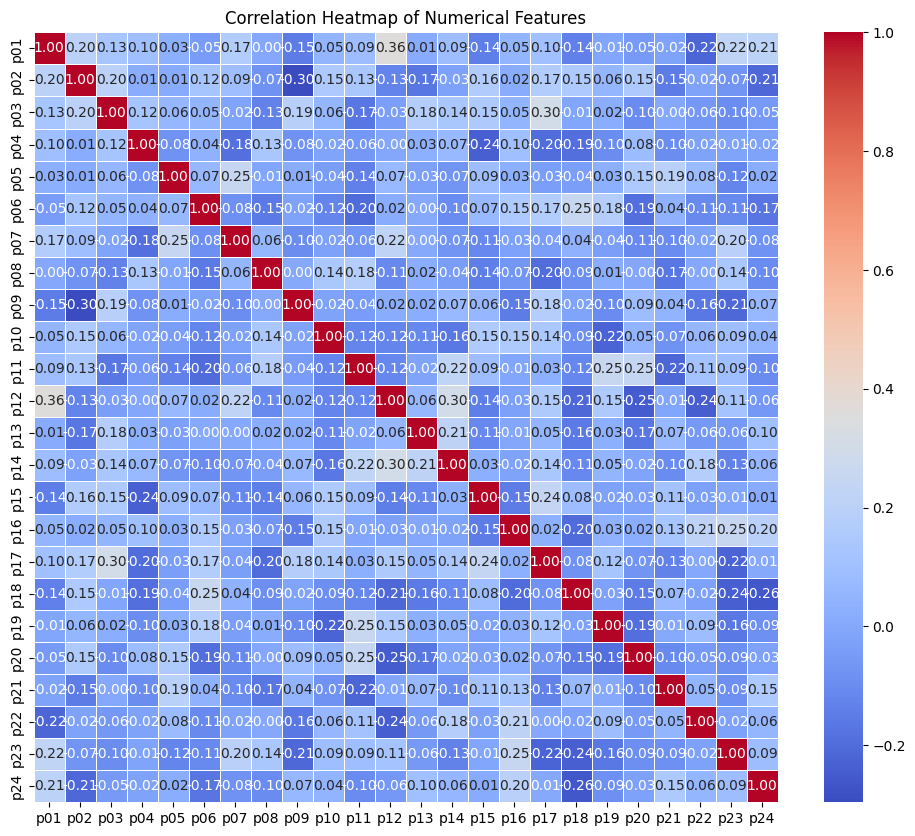

In [6]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------------------------------
# 4) Try different training set sizes
# ----------------------------------------------------
sample_sizes = [ 0.25]

results = []

for frac in sample_sizes:
    # Reduce training data
    X_train = X_train_full.sample(frac=frac, random_state=42)
    y_train = y_train_full.loc[X_train.index]

    # Train model
    model.fit(X_train, y_train)

    # Predict
    preds = model.predict(X_test)

    # Collect metrics
    if is_classification:
        metrics = {
            "train_frac": frac,
            "accuracy": accuracy_score(y_test, preds),
            "precision": precision_score(y_test, preds, average="weighted", zero_division=0),
            "recall": recall_score(y_test, preds, average="weighted", zero_division=0),
            "f1": f1_score(y_test, preds, average="weighted", zero_division=0)
        }
    else:
        metrics = {
            "train_frac": frac,
            "r2": r2_score(y_test, preds),
            "mae": mean_absolute_error(y_test, preds),
            "rmse": np.sqrt(mean_squared_error(y_test, preds))
        }

    results.append(metrics)

# ----------------------------------------------------
# 5) View results
# ----------------------------------------------------
results_df = pd.DataFrame(results)
print(results_df)



num_df = patient_df.select_dtypes(include=['int64', 'float64'])

# 1) Compute pairwise correlation
corr_matrix = num_df.corr()

# Show correlation matrix
print(corr_matrix)

# 2) Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [7]:
X_const = sm.add_constant(X)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) 
                   for i in range(X_const.shape[1])]

print(vif_data)


# anything ranging from 0-5 is acceptable, from 5-10 needs attention, greater than 10 means the there is multi-collinearity


   Feature          VIF
0    const  4027.034345
1      p01     1.799608
2      p02     1.667641
3      p03     1.653373
4      p04     1.403534
5      p05     1.402101
6      p06     1.543273
7      p07     1.397119
8      p08     1.311563
9      p09     1.489717
10     p10     1.394865
11     p11     1.907769
12     p12     2.299446
13     p13     1.279144
14     p14     1.684065
15     p15     1.577016
16     p16     1.510346
17     p17     1.680897
18     p18     1.621779
19     p19     1.488828
20     p20     1.638037
21     p21     1.345991
22     p22     1.520067
23     p23     1.729707
24     p24     1.557834


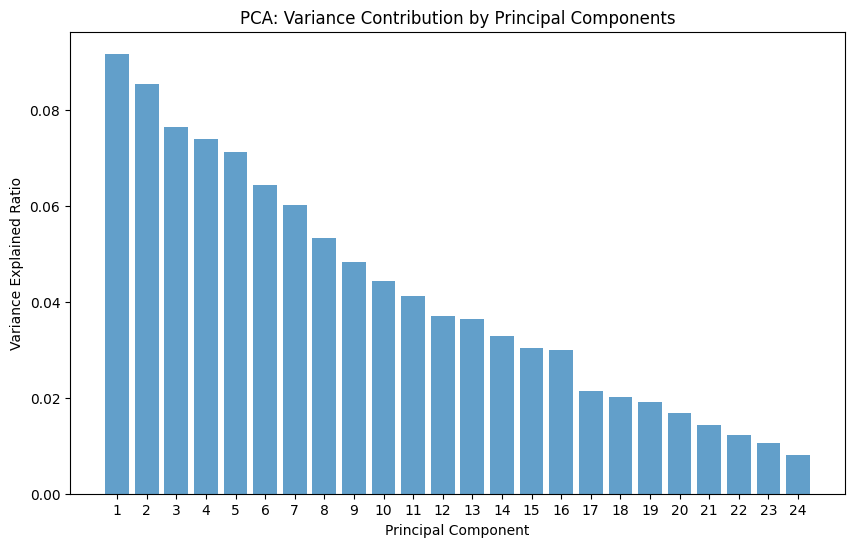

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2) Perform PCA
pca = PCA()
pca.fit(X_scaled)

# Variance explained by each PC
explained_variance = pca.explained_variance_ratio_

# 3) Bar plot of variance contributions
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained Ratio')
plt.title('PCA: Variance Contribution by Principal Components')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()


,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


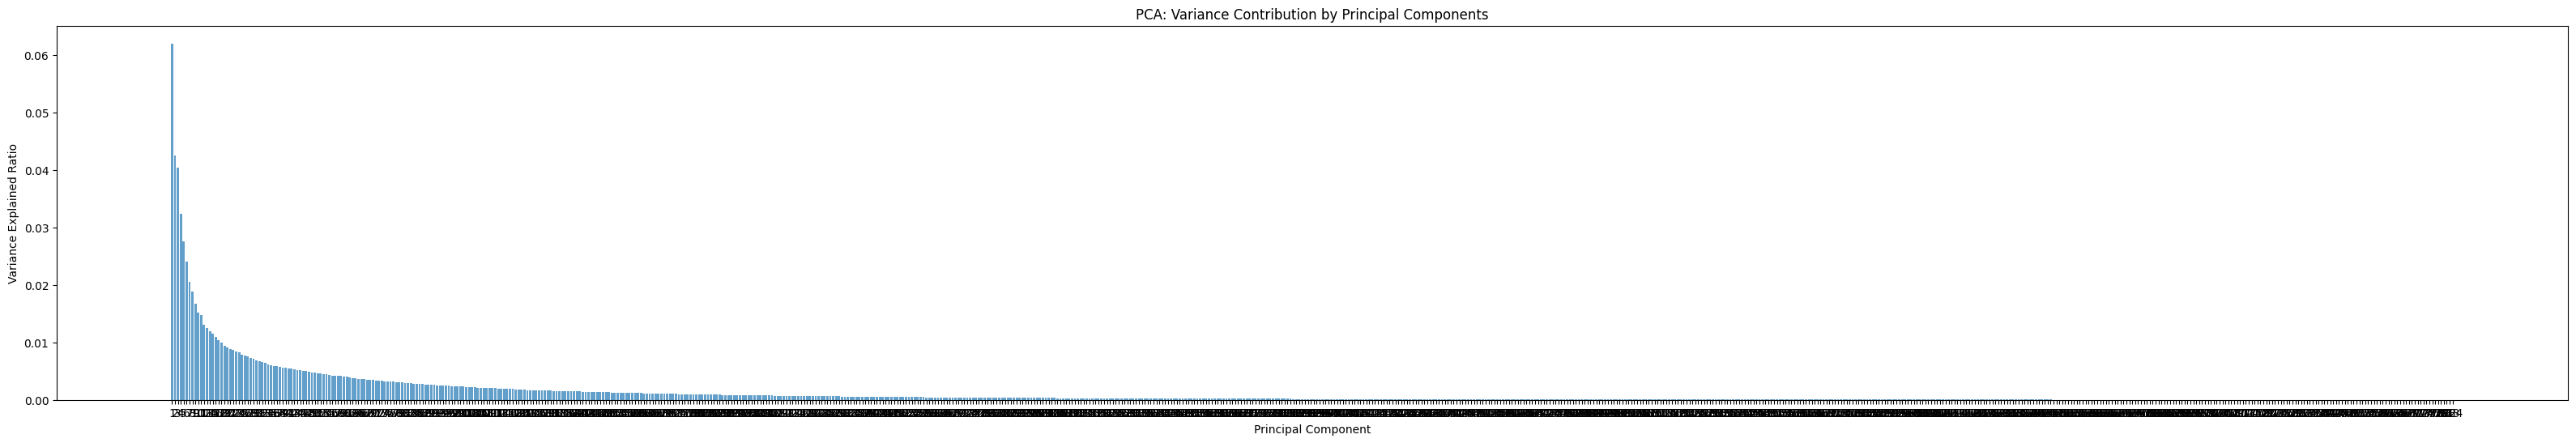

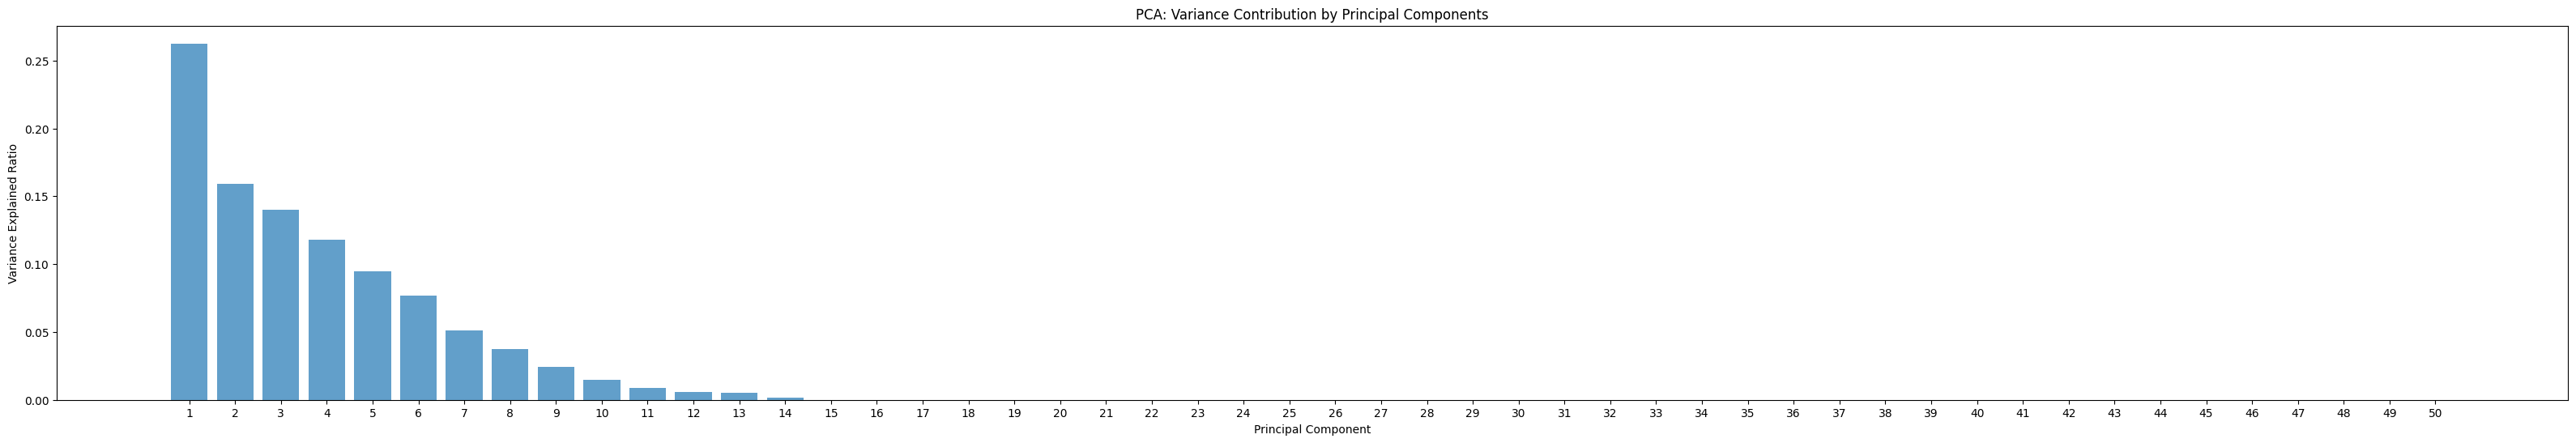

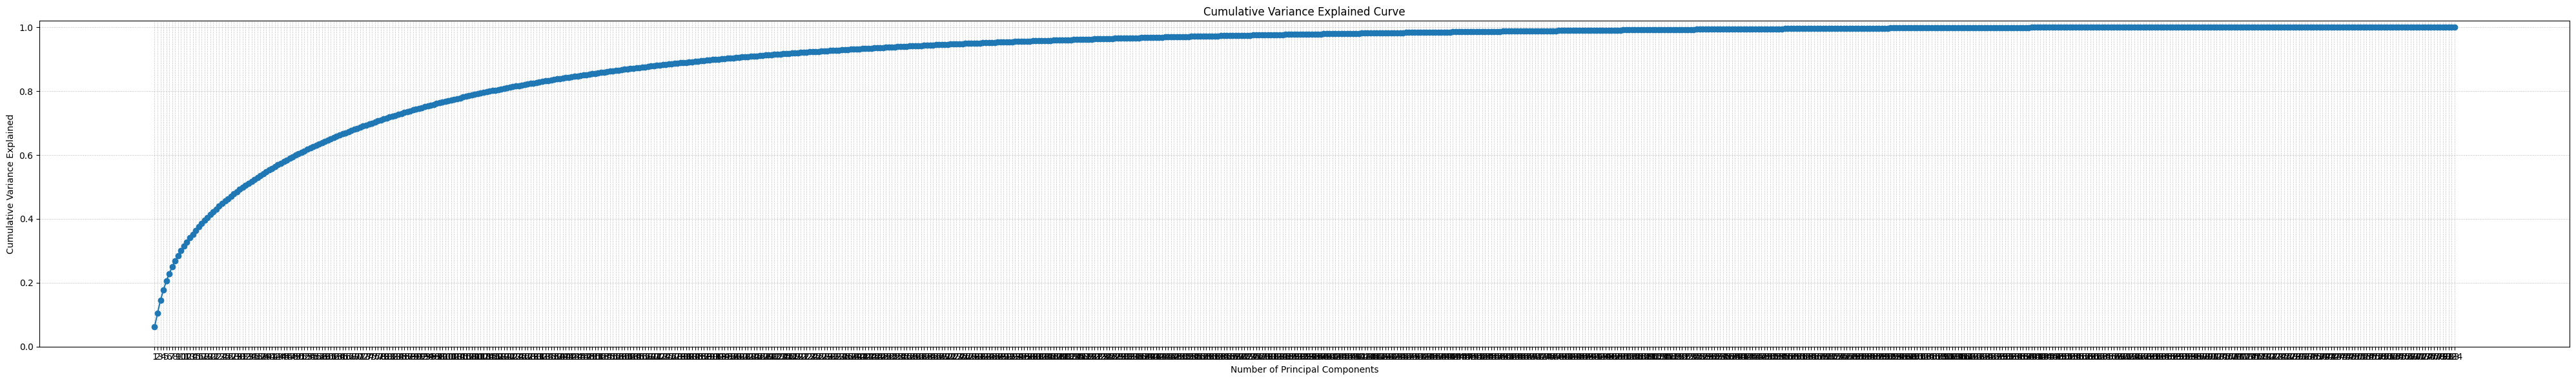

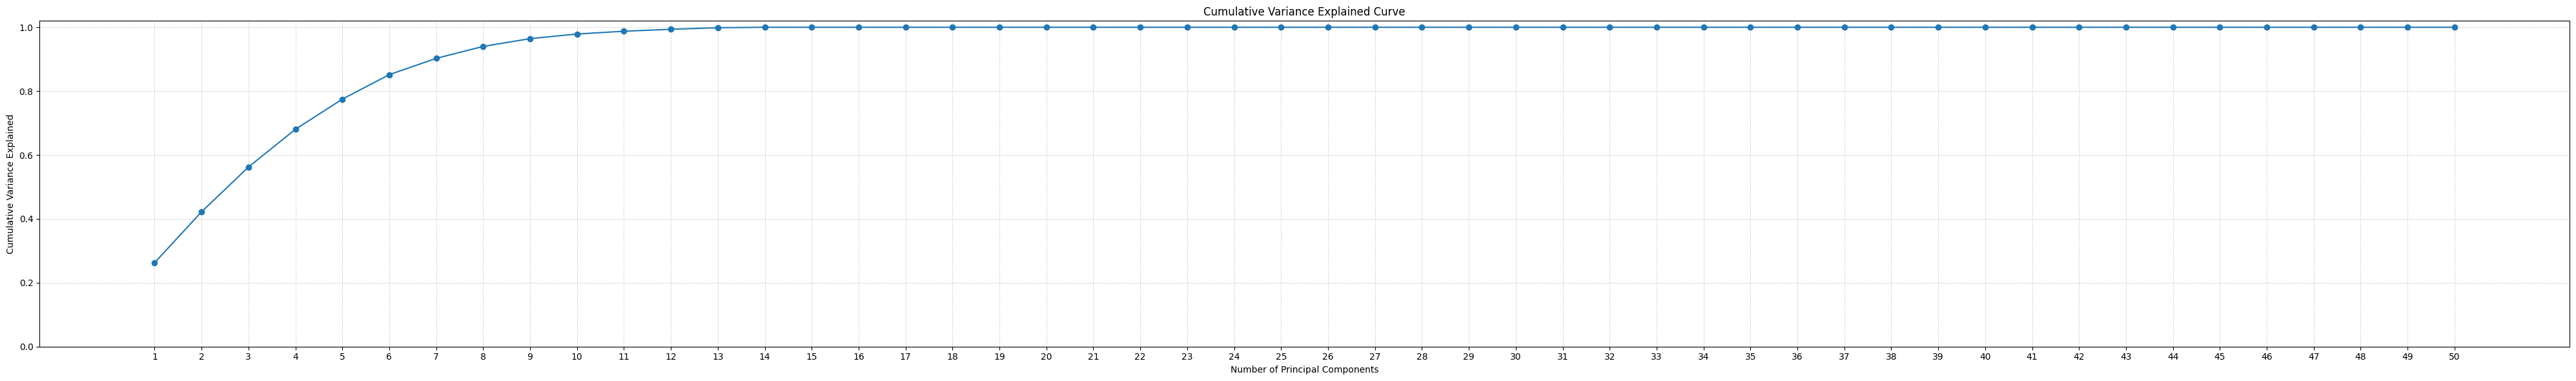

In [14]:
no_label = pd.read_csv('D:\\Downloads\\mnist_test_nolabels\\mnist_test_nolabels.csv')
display(no_label)
# Select independent variables (numeric only)
X = no_label
X2 = no_label.iloc[:, : 50]

X2 = X2.select_dtypes(include=['int64', 'float64'])
X = X.select_dtypes(include=['int64', 'float64'])

# 1) Standardize the features (VERY important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X2_scaled = scaler.fit_transform(X2)

# 2) Perform PCA
pca = PCA()
pca2 = PCA()
pca.fit(X_scaled)
pca2.fit(X2_scaled)


# Variance explained by each PC
explained_variance = pca.explained_variance_ratio_
explained_variance2 = pca2.explained_variance_ratio_

# 3) Bar plot of variance contributions
plt.figure(figsize=(40, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained Ratio')
plt.title('PCA: Variance Contribution by Principal Components')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()
plt.figure(figsize=(40, 6))
plt.bar(range(1, len(explained_variance2) + 1), explained_variance2, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained Ratio')
plt.title('PCA: Variance Contribution by Principal Components')
plt.xticks(range(1, len(explained_variance2) + 1))
plt.show()


imp = SimpleImputer(strategy='mean')
X = imp.fit_transform(X)
X2 = imp.fit_transform(X2)

cumulative_variance = np.cumsum(explained_variance)
n_components = len(explained_variance)
components = np.arange(1, n_components + 1)
plt.figure(figsize=(40, 6))
plt.plot(components, cumulative_variance, marker='o', linestyle='-')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Cumulative Variance Explained Curve")
plt.xticks(components)
plt.ylim(0, 1.02)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


cumulative_variance = np.cumsum(explained_variance2)
n_components = len(explained_variance2)
components = np.arange(1, n_components + 1)
plt.figure(figsize=(40, 6))
plt.plot(components, cumulative_variance, marker='o', linestyle='-')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Cumulative Variance Explained Curve")
plt.xticks(components)
plt.ylim(0, 1.02)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

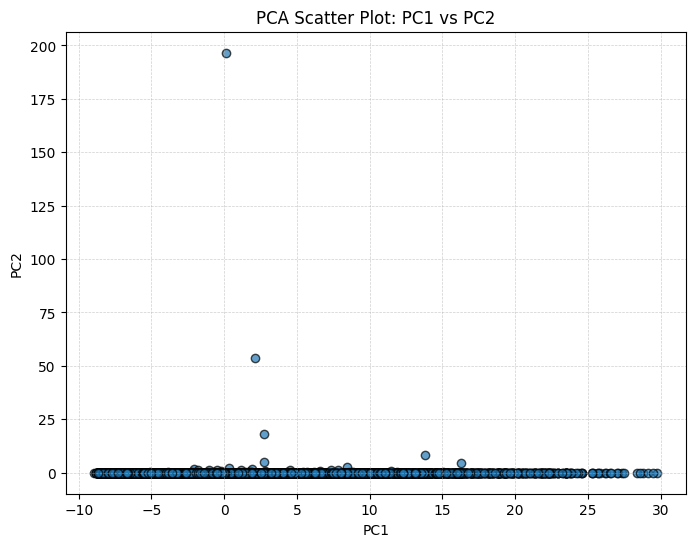

In [17]:
#pc1 vs pc1

components_1 = pca.fit_transform(X_scaled)
components_2 = pca2.fit_transform(X2_scaled)

pc1 = components_1[:, 0]
pc2 = components_2[:, 0]


plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2, alpha=0.7, edgecolor='k')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scatter Plot: PC1 vs PC2")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

plt.show()

In [23]:
display(df)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Applied PCA preprocessing: reduced 784 -> 50 dims before t-SNE.


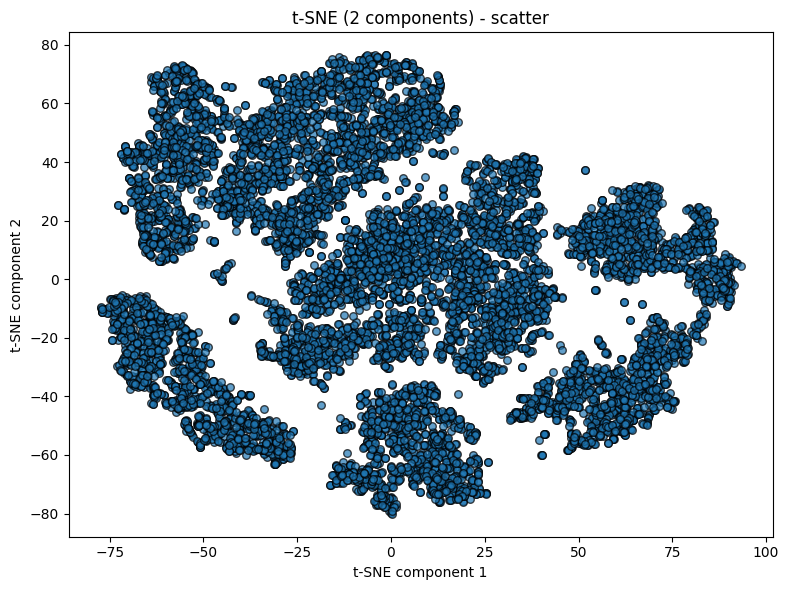

In [24]:
# tsne_plot.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ---------- CONFIG ----------
TARGET_COLUMN = None   # <-- set to your target column name if you want color (e.g. "diagnosis"), otherwise leave None
RANDOM_STATE = 42
PERPLEXITY = 30        # t-SNE perplexity (will be adjusted if too large for dataset)
N_PCA_PREPROCESS = 50  # if num_features > N_PCA_PREPROCESS, do PCA to this many dims before t-SNE
# ----------------------------

# 1) Load data
df = pd.read_csv('D:\\Downloads\\mnist_test_nolabels\\mnist_test_nolabels.csv')

# 2) Prepare X (numeric features only). If you have a target, drop it from X.
# if TARGET_COLUMN is not None and TARGET_COLUMN in df.columns:
#     y = df['Ailment'].copy()
#     X_df = df.drop(columns=['Ailment'])
# else:
y = None
X_df = df.copy()

# Keep numeric columns only (t-SNE expects numeric input)
X_num = X_df.select_dtypes(include=[np.number])

# 3) Impute missing numeric values (mean)
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X_num)

# 4) Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 5) Optional: encode target for coloring
if y is not None:
    # If target is numeric it can be used directly; otherwise label-encode it
    if y.dtype == object or y.dtype.name == 'category':
        le = LabelEncoder()
        y_enc = le.fit_transform(y.astype(str))
    else:
        y_enc = y.values
else:
    y_enc = None

# 6) If very high-dimensional, do PCA first to speed up t-SNE
n_features = X_scaled.shape[1]
X_for_tsne = X_scaled
if n_features > N_PCA_PREPROCESS:
    pca = PCA(n_components=N_PCA_PREPROCESS, random_state=RANDOM_STATE)
    X_for_tsne = pca.fit_transform(X_scaled)
    print(f"Applied PCA preprocessing: reduced {n_features} -> {N_PCA_PREPROCESS} dims before t-SNE.")

# 7) Adjust perplexity if needed (perplexity must be < n_samples - 1)
n_samples = X_for_tsne.shape[0]
max_perplex = max(5, min(PERPLEXITY, (n_samples - 1) // 3))  # conservative upper bound
if max_perplex != PERPLEXITY:
    print(f"Adjusted perplexity from {PERPLEXITY} to {max_perplex} based on sample size ({n_samples}).")
PERPLEXITY = int(max_perplex)

# 8) Run t-SNE (2 components)
tsne = TSNE(n_components=2, perplexity=PERPLEXITY, random_state=RANDOM_STATE, init='pca')
X_tsne = tsne.fit_transform(X_for_tsne)

# 9) Plot
plt.figure(figsize=(8, 6))
if y_enc is None:
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=30, alpha=0.7, edgecolor='k')
    plt.title("t-SNE (2 components) - scatter")
else:
    # colored scatter by class
    unique_labels = np.unique(y_enc)
    cmap = plt.get_cmap("tab10") if len(unique_labels) <= 10 else plt.get_cmap("tab20")
    for i, lbl in enumerate(unique_labels):
        mask = (y_enc == lbl)
        plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1],
                    s=40, alpha=0.75, label=str(lbl), edgecolor='k', cmap=cmap)
    plt.legend(title="class", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title("t-SNE (2 components) - colored by target")

plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.grid(False)
plt.tight_layout()
plt.show()